# Introduction

There has been a surge in e-commerce and digital transactions all around the world.
Authorising a credit card to any bank customer is quite risky.
Financial institutions are increasingly turning to machine learning to identify the creditcard applicant's credit worthiness.
We will be analysing the credit_card csv dataset to predict if an applicant will be approved/rejected for credit-card based on the applicant's details.



We shall begin by importing the required libraries

In [574]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline

Loading the datasets into a dataframe using pandas.

In [575]:
#loading the csv which has the information about the applicants in the dataframe 
df=pd.read_csv('Credit_card.csv')

In [576]:
#Loading the csvv which has the information about the applicants who are approved or rejected in the dataframe.
df_label=pd.read_csv('Credit_card_label.csv')

Check the number of columns and rows in our dataframe.

In [577]:
#Checking the number of rows and the columns in the dataframe.
df.shape

(1548, 18)

The Ind_ID column is common in both the dataframes.We will merge both the dataframes.
Merge will automatically drop one  of the Ind_ID column.

In [578]:
# Merging both the dataframe.Ind_Id is the column which links both the dataframes
df_fin=pd.merge(df,df_label)


Check if the data is correctly loaded and merged.

In [579]:
df_fin.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [513]:
#Checking the datatypes of the columns in the dataframe.
df_fin.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

# Exploratory Analysis and Visualization

Questions to be Answered:

1) Are males having better credit than females? 
2) which type of income has a better credit score? 
2) Having a property a plus for credit card approval?
3) Does number of children or no children affect the credit card score?
4) Which class of workers have better approval rate?
5) Does applicant's level of education play any part when it comes to approval of credit card?


Lets explore the column Gender.Let us see the total number of male and female candidates.

In [514]:
df_fin['GENDER'].value_counts()

GENDER
F    973
M    568
Name: count, dtype: int64

The number of female applicants are more than the male applicants.

<Axes: xlabel='GENDER', ylabel='Count'>

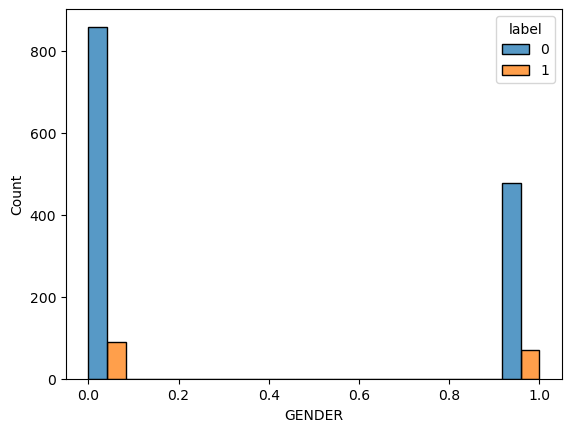

In [567]:
sns.histplot(df_fin,x='GENDER',hue='label',multiple='dodge',legend=True)

It can be inferred from the plot that as number of female applicants are significantly more than the male applicants,the 
rejections of female applicants is going to be more as comapred to the number of rejections of male applicants.
At the same time, the number of female applicants credit card whose credit card is approved is just slightly higher than that of male applicants.

In [199]:
f=df_fin.loc[(df_fin['GENDER']=='F') & (df_fin['label']==1)]
print(len(f))

m=df_fin.loc[(df_fin['GENDER']=='M') & (df_fin['label']==1)]
print(len(m))

95
75


In [200]:
f_m=df_fin.loc[(df_fin['GENDER']=='F') & (df_fin['label']==0)& (df_fin['Marital_status']=='Married')]
f_m_nc=df_fin.loc[(df_fin['GENDER']=='F') & (df_fin['label']==0)& (df_fin['Marital_status']!='Married')]
print(len(f_m_nc))

312


Checking if married females have better credit score than not married ones.

<Axes: xlabel='Count', ylabel='Marital_status'>

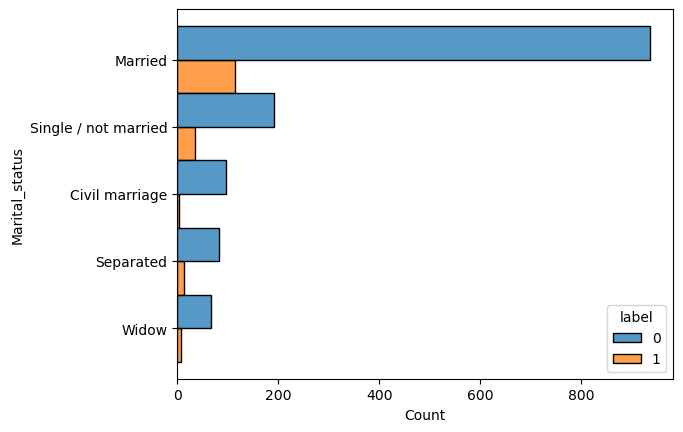

In [207]:
sns.histplot(df_fin['GENDER']=='F',y=df_fin['Marital_status'],hue=df_fin['label'],multiple='dodge')

Number of married females are more than the rest of the categories.Hence, the rejection rate is also the highest.

Let us explore the Type_income and observe which group of income have better acceptance rate.

In [309]:
df_fin['Type_Income'].value_counts()

Type_Income
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: count, dtype: int64

In [369]:
#Checking the approval percentage in each of Income group
#Working Group
print(len(df_fin.loc[(df_fin['Type_Income']=='Working') & df_fin['label']==1])/len(df_fin.loc[df_fin['Type_Income']=='Working'])*100)

 #Commercial Associate
print(len(df_fin.loc[(df_fin['Type_Income']=='Commercial associate') & df_fin['label']==1])/len(df_fin.loc[df_fin['Type_Income']=='Commercial associate'])*100)

#Pensioner
print(len(df_fin.loc[(df_fin['Type_Income']=='Pensioner') & df_fin['label']==1])/len(df_fin.loc[df_fin['Type_Income']=='Pensioner'])*100)

#State Servant
print(len(df_fin.loc[(df_fin['Type_Income']=='State servant') & df_fin['label']==1])/len(df_fin.loc[df_fin['Type_Income']=='State servant'])*100)


9.649122807017543
13.698630136986301
15.613382899628252
5.172413793103448


We can infer that Commercial Associates and Pensioners have better approval rate as compared to the other groups.

<Axes: xlabel='Type_Income', ylabel='Count'>

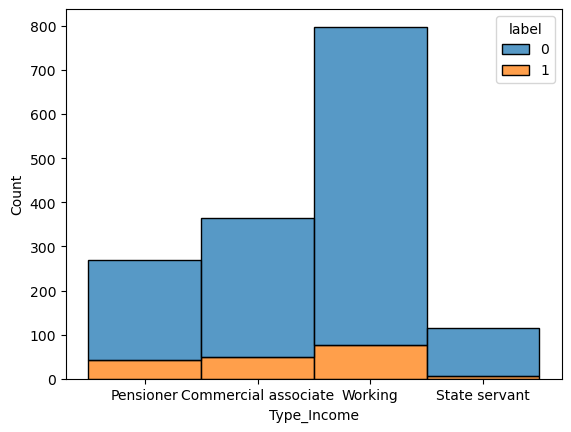

In [188]:
sns.histplot(df_fin,x='Type_Income',hue='label',multiple='stack')

The number of applicants from working category are the highest.
They have a relatively higher rejection rate compared to rest of the type_income category.

In [375]:
df_fin['Propert_Owner'].value_counts()

Propert_Owner
Y    1010
N     538
Name: count, dtype: int64

<Axes: xlabel='Propert_Owner', ylabel='Count'>

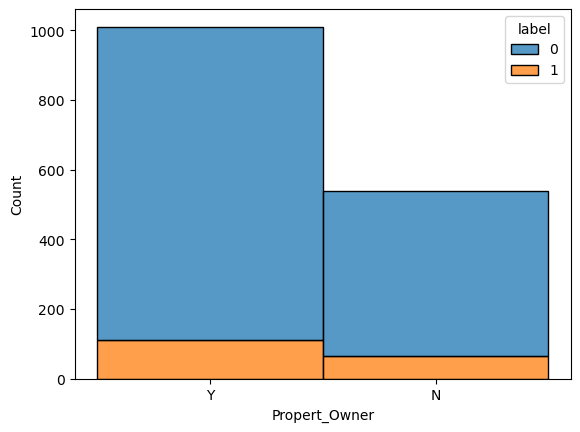

In [372]:
sns.histplot(df_fin,x='Propert_Owner',hue='label',multiple='stack')

Almost 1000 applicants have a property while approximately 500 have none.The rejection rate in both the group is almost the same.It seems like having a property is not having an impact on deciding if an applicant is worthy of a credit card.
We can probably drop this column before the training the data.Let us see the percentage of the people who own a property and have been approved the credit card as compared to the ones who dont but still have been approved  for the credit card

In [374]:
print(len(df_fin.loc[(df_fin['Propert_Owner']=='Y') & df_fin['label']==1])/len(df_fin.loc[df_fin['Propert_Owner']=='Y'])*100)

print(len(df_fin.loc[(df_fin['Propert_Owner']=='N') & df_fin['label']==1])/len(df_fin.loc[df_fin['Propert_Owner']=='N'])*100)

10.891089108910892
12.0817843866171


Only 10% of the total applicants who have a property have been approved for credit card whereas the applicants who don't own a property have better approval rate.

In [376]:
df_fin['CHILDREN'].value_counts()

CHILDREN
0     1091
1      305
2      134
3       16
4        1
14       1
Name: count, dtype: int64

The record with 14 children is clearly an outlier.Since its only one record,we can safely drop the particular record.

In [378]:
df_fin.loc[df_fin['CHILDREN']==14]


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
565,5061207,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754.0,-1689,1,0,0,0,Drivers,15,0


In [379]:
df_fin.drop([565],inplace=True)

In [ ]:
Using the basic drop method,we drop the particular row.

<Axes: xlabel='CHILDREN', ylabel='Count'>

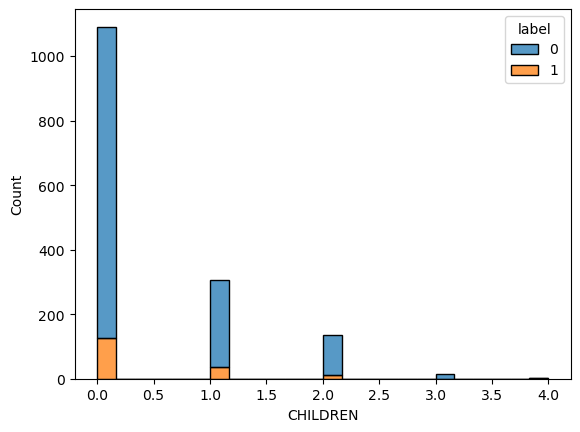

In [381]:
sns.histplot(df_fin,x='CHILDREN',hue='label',multiple='stack')

Major chunk of the applicants do not have kids and only 19% of total applicants have one kid and even lower percent of applicants have 2 or more than 2 kids.Approval rates in either of the group is not that significant. 

In [383]:
print(len(df_fin.loc[(df_fin['CHILDREN']==0) & df_fin['label']==1])/len(df_fin.loc[df_fin['CHILDREN']==0])*100)

11.54903758020165


70% of applicants do not have kids.Only 11% of applicants who don't have kids are approved for credit card.

Let us explore if type of occupation plays a significant part in determining the credibility of an applicant.

<Axes: xlabel='Count', ylabel='Type_Occupation'>

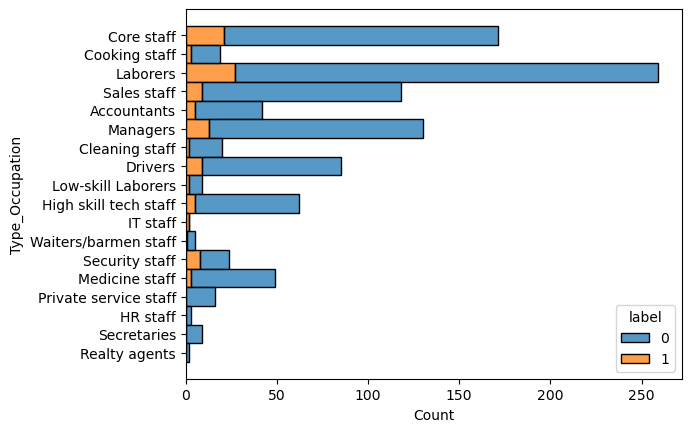

In [356]:
sns.histplot(df_fin,y='Type_Occupation',hue='label',multiple='stack')

Major workforce belongs to Laborers and the Core staff group.Next comes the Managers abd thhe Sales staff.Lets explore the group individually and determine the percentage of the (approved)applicants in these groups.

In [400]:
#Checking the approval rate 
#Laborers
print(len(df_fin.loc[(df_fin['Type_Occupation']=='Laborers') & df_fin['label']==1])/len(df_fin.loc[df_fin['Type_Occupation']=='Laborers'])*100)


#Core_staff
print(len(df_fin.loc[(df_fin['Type_Occupation']=='Core staff') & df_fin['label']==1])/len(df_fin.loc[df_fin['Type_Occupation']=='Core staff'])*100)



#Managers
print(len(df_fin.loc[(df_fin['Type_Occupation']=='Managers') & df_fin['label']==1])/len(df_fin.loc[df_fin['Type_Occupation']=='Managers'])*100)

#Sales_staff
print(len(df_fin.loc[(df_fin['Type_Occupation']=='Sales staff') & df_fin['label']==1])/len(df_fin.loc[df_fin['Type_Occupation']=='Sales staff'])*100)


print(len(df_fin.loc[(df_fin['Type_Occupation']=='Accountants') & df_fin['label']==1])/len(df_fin.loc[df_fin['Type_Occupation']=='Accountants'])*100)






10.44776119402985
13.218390804597702
10.294117647058822
8.19672131147541
11.363636363636363


The approval rate for applicants is higher for Core_staff as compared to applicants pertaining to other groups.
The approval percentage for Managers and Labourers is almost the same.

Let us explore the Education column.

<Axes: xlabel='Count', ylabel='EDUCATION'>

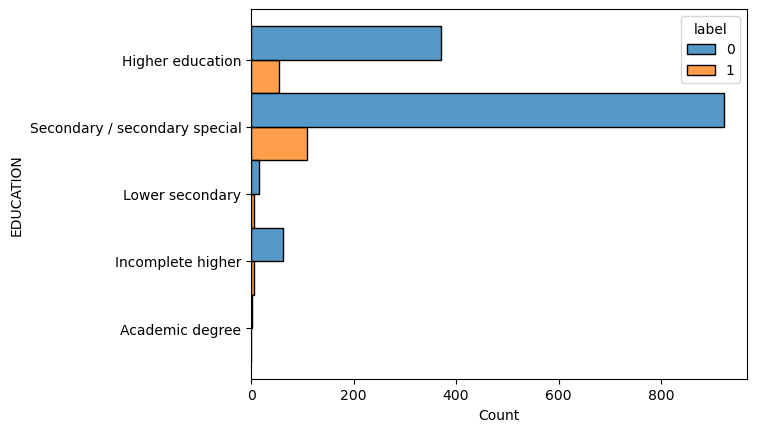

In [208]:
sns.histplot(df_fin,y='EDUCATION',hue='label',multiple='dodge')

Most applicants have Secondary/Secondary special education.The applicants with HigherEducation seems to have a better chances of getting approved.

In [397]:
print(len(df_fin.loc[(df_fin['EDUCATION']=='Higher education') & df_fin['label']==1])/len(df_fin.loc[df_fin['EDUCATION']=='Higher education'])*100)



print(len(df_fin.loc[(df_fin['EDUCATION']=='Secondary / secondary special') & df_fin['label']==1])/len(df_fin.loc[df_fin['EDUCATION']=='Secondary / secondary special'])*100)


print(len(df_fin.loc[(df_fin['EDUCATION']=='Lower secondary') & df_fin['label']==1])/len(df_fin.loc[df_fin['EDUCATION']=='Lower secondary'])*100)




12.910798122065728
10.58252427184466
28.57142857142857


Though Higher and Secondary education are the major groups ,the lower secondary education have a better approval percentage.

Let us explore the Annual income group.

In [290]:
# Applicants who are working
print(len(df_fin[df_fin['Employed_days']<0]))
#Applicants who are working and got the approval.
print(len(df_fin.loc[(df_fin['Employed_days']<0)& (df_fin['label']==1)]))
# Applicants who are non-working
print(len(df_fin[df_fin['Employed_days']>=0]))

1287
140
261


<Axes: xlabel='Annual_income', ylabel='Count'>

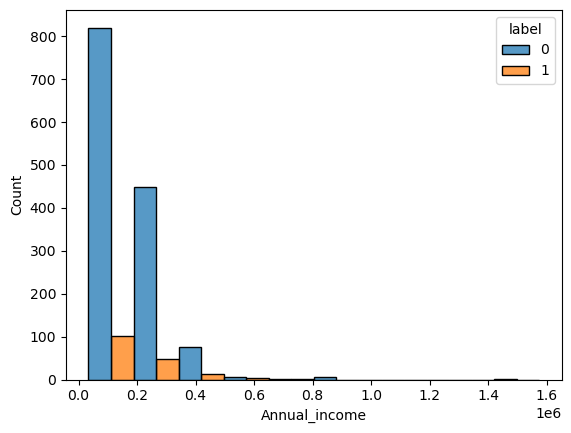

In [519]:
sns.histplot(df_fin,x='Annual_income',hue='label',multiple='dodge',bins=10)

<Axes: xlabel='Count', ylabel='Family_Members'>

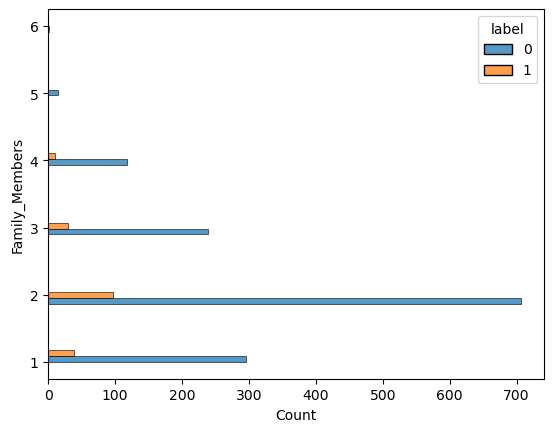

In [412]:
sns.histplot(df_fin,y='Family_Members',hue='label',multiple='dodge')

The number of families with 2 members are in majority.However,the rejection rate is also higher as compared to those with only
one family member.

In [582]:
#applicants having 3 family members
print(len(df_fin.loc[(df_fin['Family_Members']==3) & df_fin['label']==1])/len(df_fin.loc[(df_fin['Family_Members']==3)])*100)


#applicants having 2 family members
print(len(df_fin.loc[(df_fin['Family_Members']==2) & df_fin['label']==1])/len(df_fin.loc[(df_fin['Family_Members']==2)])*100)


#applicants having 1 family members
print(len(df_fin.loc[(df_fin['Family_Members']==1) & df_fin['label']==1])/len(df_fin.loc[(df_fin['Family_Members']==1)])*100)

10.820895522388058
11.970074812967582
11.676646706586826


In [586]:
# total no of applicants who are currently working
print(len(df_fin.loc[df_fin['Employed_days']<=0]))


# total number of applicants who are working and approved for credit_Card
print(len((df_fin.loc[(df_fin['Employed_days']<=0) & (df_fin['label']==1)])))

1287
140


There are 1287 applicants who are currently working.
Only 140 applicants (who are working) out of the 1287 applicants have got the approval for the credit card.
261  applicants are non-working.
Let us see the approval rate in non-working category.

In [291]:
#No of approvals in non-working category.
print(len(df_fin.loc[(df_fin['Employed_days']>=0)& (df_fin['label']==1)]))

35


35 out of 261 applicants who are non working have got the approval for the credit card.Let us check if these non working applicants are pensioners.

In [292]:
#df_fin.loc[(df_fin['Employed_days']>=0)& (df_fin['label']==1)]
#No of pensioners 
print(len(df_fin.loc[df_fin['Type_Income']=='Pensioner']))
#no of pensioners who have got the approval for credit_card
print(len(df_fin.loc[(df_fin['Employed_days']>=0)& (df_fin['label']==1) & (df_fin['Type_Income']=='Pensioner')]))
#no of pensioners who have got rejected for credit_card
print(len(df_fin.loc[(df_fin['Employed_days']>=0)& (df_fin['label']==0) & (df_fin['Type_Income']=='Pensioner')]))

269
35
226


Approximately 25% of the credit-card approved applicants are pensioners.
There are 269 pensioners and only 35 pensioners are termed fit for credit card.

# Ydata profiling

In [53]:
df_d=df_fin.drop(['Ind_ID'],axis=1)

In [54]:
prof = ProfileReport(df_d)
prof.to_file(output_file='output_credit_card.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

We perform the Ydata profiling which give us great insights.
We can infer from the output that the value for mobile is constant.All the applicants have a mobile phone.
Since the value is constant, we can drop the column.
The columns which have fairly good correlation with the output column are Housing_type,Annual_income,Type_Occupation,Type_income.

Other Insights:

Annual_income column:
11% of the total applicants fall in the range of 135000.





# Handling missing values.

In [587]:
df_fin.isnull().mean()*100


Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

As the percentage of missing values in both Annual_income and birthday_count column are less 5%,we can delete these rows from the dataframe.

As discussed earlier,since the mobile_phone has constant value throughout,we can drop the column from the dataframe before treating the missing values.

In [588]:
df_fin.drop('Mobile_phone',axis=1,inplace=True)

In [589]:
df_fin.dropna(subset=['Annual_income','Birthday_count','GENDER'],inplace=True)

There are 471 missing values in the type_occupation column.
421 applicants are those whose credit_card was rejected and the rest 50 applicants were approved.

We can use IterativeImputer to impute the Type_Occupation column.From the Y_data profiling, we can infer that the output column has relatively better correlation with columns like housing_type,type_income,education,

Before we proceed with the Label encoding, we can drop the Ind_Id column as it won't be required for training the model

In [590]:
df_fin.drop('Ind_ID',axis=1,inplace=True)

In [524]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [525]:
impute_col='Type_Occupation'
impute_col_encoded='Type_Occupation_no'

In [526]:
le.fit(df_fin.loc[:,impute_col])

LabelEncoder()

In [527]:
l_1=LabelEncoder()
l_2=LabelEncoder()
l_3=LabelEncoder()
l_4=LabelEncoder()
l_5=LabelEncoder()
l_6=LabelEncoder()
l_7=LabelEncoder()

In [528]:
df_fin['GENDER']=l_1.fit_transform(df_fin['GENDER'])
df_fin['Car_Owner']=l_2.fit_transform(df_fin['Car_Owner'])
df_fin['Propert_Owner']=l_3.fit_transform(df_fin['Propert_Owner'])
df_fin['Type_Income']=l_4.fit_transform(df_fin['Type_Income'])
df_fin['EDUCATION']=l_5.fit_transform(df_fin['EDUCATION'])
df_fin['Marital_status']=l_6.fit_transform(df_fin['Marital_status'])
df_fin['Housing_type']=l_7.fit_transform(df_fin['Housing_type'])

In [529]:
df_fin.head(8)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,1,1,1,0,180000.0,1,1,1,1,-18772.0,365243,0,0,0,NaN,2,1
1,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,0,NaN,2,1
4,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,0,NaN,2,1
6,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,0,NaN,2,1
7,0,0,0,0,180000.0,1,4,1,1,-22134.0,365243,0,0,0,NaN,2,1
8,1,1,1,1,450000.0,0,4,1,1,-18173.0,-678,0,1,1,Core staff,3,1
9,1,1,1,1,450000.0,1,4,1,1,-18173.0,-678,0,1,1,Core staff,3,1
10,1,1,1,1,450000.0,0,4,3,1,-18173.0,-678,0,1,1,Core staff,1,1


In [530]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'Accountants': 0,
 'Cleaning staff': 1,
 'Cooking staff': 2,
 'Core staff': 3,
 'Drivers': 4,
 'HR staff': 5,
 'High skill tech staff': 6,
 'IT staff': 7,
 'Laborers': 8,
 'Low-skill Laborers': 9,
 'Managers': 10,
 'Medicine staff': 11,
 'Private service staff': 12,
 'Realty agents': 13,
 'Sales staff': 14,
 'Secretaries': 15,
 'Security staff': 16,
 'Waiters/barmen staff': 17,
 nan: 18}

In [531]:
df_fin.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,1,1,1,0,180000.0,1,1,1,1,-18772.0,365243,0,0,0,NaN,2,1
1,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,0,NaN,2,1
4,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,0,NaN,2,1
6,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,0,NaN,2,1
7,0,0,0,0,180000.0,1,4,1,1,-22134.0,365243,0,0,0,NaN,2,1


In [532]:
dict(zip(l_4.classes_,l_4.transform(l_4.classes_)))

{'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Working': 3}

Apply label transformation

In [533]:
df_fin[impute_col_encoded]=le.transform(df_fin[impute_col])


In [534]:
df_fin[['Type_Income','Type_Occupation','Type_Occupation_no']].head(7)

,Type_Income,Type_Occupation,Type_Occupation_no
0,1,NaN,18
1,0,NaN,18
4,0,NaN,18
6,0,NaN,18
7,1,NaN,18
8,0,Core staff,3
9,1,Core staff,3


Make the Nan number equivalent to Nan again 

In [536]:

df_fin[impute_col_encoded]=df_fin[impute_col_encoded].map(lambda x:np.nan if x==18 else x)
df_fin.head(7)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Type_Occupation_no
0,1,1,1,0,180000.0,1,1,1,1,-18772.0,365243,0,0,0,NaN,2,1,NaN
1,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,0,NaN,2,1,NaN
4,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,0,NaN,2,1,NaN
6,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,0,NaN,2,1,NaN
7,0,0,0,0,180000.0,1,4,1,1,-22134.0,365243,0,0,0,NaN,2,1,NaN
8,1,1,1,1,450000.0,0,4,1,1,-18173.0,-678,0,1,1,Core staff,3,1,3.0
9,1,1,1,1,450000.0,1,4,1,1,-18173.0,-678,0,1,1,Core staff,3,1,3.0


In [537]:
imputer=IterativeImputer(random_state=100)

In [538]:
df_train=df_fin.loc[:,['Annual_income','Type_Income','EDUCATION','Housing_type','Type_Occupation_no']]
df_train.head(7)

,Annual_income,Type_Income,EDUCATION,Housing_type,Type_Occupation_no
0,180000.0,1,1,1,NaN
1,315000.0,0,1,1,NaN
4,315000.0,0,1,1,NaN
6,315000.0,0,1,1,NaN
7,180000.0,1,4,1,NaN
8,450000.0,0,4,1,3.0
9,450000.0,1,4,1,3.0


In [539]:
imputer.fit(df_train)

IterativeImputer(random_state=100)

In [540]:
df_imputed=imputer.transform(df_train)
df_imputed[:10]

array([[1.80000000e+05, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        7.56950609e+00],
       [3.15000000e+05, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        7.74173061e+00],
       [3.15000000e+05, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        7.74173061e+00],
       [3.15000000e+05, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        7.74173061e+00],
       [1.80000000e+05, 1.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        7.82061538e+00],
       [4.50000000e+05, 0.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        3.00000000e+00],
       [4.50000000e+05, 1.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        3.00000000e+00],
       [4.50000000e+05, 0.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        3.00000000e+00],
       [9.00000000e+04, 3.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        2.00000000e+00],
       [9.00000000e+04, 3.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        2.00000000e+00]])

In [541]:
df_imputed[:,1].round()

array([1., 0., 0., ..., 3., 3., 3.])

In [542]:
df_fin.loc[:,[impute_col_encoded]]=df_imputed[:,1].round()
df_fin.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Type_Occupation_no
0,1,1,1,0,180000.0,1,1,1,1,-18772.0,365243,0,0,0,NaN,2,1,1.0
1,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,0,NaN,2,1,0.0
4,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,0,NaN,2,1,0.0
6,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,0,NaN,2,1,0.0
7,0,0,0,0,180000.0,1,4,1,1,-22134.0,365243,0,0,0,NaN,2,1,1.0


In [543]:
Type_occupation_imputed=list(le.inverse_transform(df_fin[impute_col_encoded].round().astype('int')))
Type_occupation_imputed[:10]

['Cleaning staff',
 'Accountants',
 'Accountants',
 'Accountants',
 'Cleaning staff',
 'Accountants',
 'Cleaning staff',
 'Accountants',
 'Core staff',
 'Core staff']

In [544]:
df_fin['Type_occupation_imputed']=Type_occupation_imputed


In [545]:
df_fin.isnull().mean()*100

GENDER                      0.000000
Car_Owner                   0.000000
Propert_Owner               0.000000
CHILDREN                    0.000000
Annual_income               0.000000
Type_Income                 0.000000
EDUCATION                   0.000000
Marital_status              0.000000
Housing_type                0.000000
Birthday_count              0.000000
Employed_days               0.000000
Work_Phone                  0.000000
Phone                       0.000000
EMAIL_ID                    0.000000
Type_Occupation            31.483957
Family_Members              0.000000
label                       0.000000
Type_Occupation_no          0.000000
Type_occupation_imputed     0.000000
dtype: float64

Now that we have treated the missing values,let us split the dataframe into a training and test data using scikitlearn

In [546]:
from sklearn.model_selection import train_test_split

In [547]:
x_train,x_test,y_train,y_test=train_test_split(df_fin.drop(columns=['Type_Occupation','Type_occupation_imputed','label']),df_fin['label'],test_size=0.2)

In [548]:
x_train

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,Type_Occupation_no
1459,0,0,1,0,171000.0,3,1,1,1,-18348.0,-3853,0,0,0,2,3.0
792,0,1,1,0,112500.0,3,1,1,1,-10101.0,-505,1,1,0,2,3.0
837,0,1,1,1,135000.0,0,1,1,1,-11278.0,-2481,0,0,0,3,0.0
395,1,1,1,1,112500.0,3,4,1,1,-11279.0,-508,0,0,0,3,3.0
1466,1,0,1,1,202500.0,0,4,1,1,-14952.0,-104,0,1,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,0,1,1,0,225000.0,1,4,1,1,-22920.0,365243,0,0,0,2,1.0
1496,1,0,1,0,225000.0,0,4,3,1,-9149.0,-1217,0,0,1,1,0.0
800,0,1,0,1,315000.0,0,1,1,1,-11025.0,-2065,1,1,1,3,0.0
1369,0,0,1,1,202500.0,2,4,0,1,-15975.0,-8760,0,0,0,3,2.0


Let us import the necessary training models from scikitlearn.
Since its a classification problem we will be using the following algorithms to train the model.
logistic regression
Decision Tree
RandomForest
Support Vector 

In [550]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [559]:
# Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Logistic Regression Accuracy:',accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
print('Logistic Regression Precision:',precision)

Logistic Regression Accuracy: 0.88
Logistic Regression Precision: 0.7744


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [560]:
#Decision Tree
tree = DecisionTreeClassifier() 
tree.fit(x_train, y_train) 
y_pred = tree.predict(x_test) 
print(" Decision Tree Accuracy:", accuracy_score(y_test, 
                                  y_pred))
precision = precision_score(y_test, y_pred, average='weighted')
print(' Decision Tree Precision:',precision)

 Decision Tree Accuracy: 0.89
 Decision Tree Precision: 0.8861287027579162


In [557]:
#Random Forest
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(" Random Forest Accuracy:", accuracy_score(y_test, 
                                  y_pred))
precision = precision_score(y_test, y_pred, average='weighted')
print(' Random Forest Precision:',precision)

 Random orest Accuracy: 0.9233333333333333
 Random Forest Precision: 0.9205819995842861


In [573]:
# Support Vector Machine
sv=SVC()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
print(" Support Vector Machine Accuracy:", accuracy_score(y_test, 
                                  y_pred)) 
precision = precision_score(y_test, y_pred, average='weighted')
print(' Support Vector Machine Precision:',precision)

 Support Vector Machine Accuracy: 0.88
 Support Vector Machine Precision: 0.7744


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the result we can conclude that the Random Forest has the best accuracy and precision score.